Weather Predicting Model with Python and Machine Learning

In [ ]:
import pandas as pd
import sklearn

# Loading Data

Data is a time series data

In [ ]:
weather = pd.read_csv("weather.csv", index_col="DATE")

In [ ]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",20.0,10.0,NaN,NaN,1254.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.0,80.0,NaN,NaN,2218.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",20.0,30.0,NaN,NaN,1206.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",90.0,100.0,NaN,NaN,2148.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.0,70.0,NaN,NaN,1936.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.53,NaN,2208.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,18.57,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,13.87,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
weather.apply(pd.isnull).sum()

STATION        0
NAME           0
ACMH       10287
ACSH       10286
AWND        1466
FMTM        6099
PGTM        5556
PRCP           0
SNOW           0
SNWD           2
TAVG        9444
TMAX           0
TMIN           0
TSUN       16194
WDF1       10291
WDF2        5968
WDF5        6051
WDFG       11102
WDFM       16222
WESD       10243
WSF1       10288
WSF2        5968
WSF5        6052
WSFG       10363
WSFM       16222
WT01       10038
WT02       15274
WT03       15095
WT04       15945
WT05       15864
WT06       16080
WT07       16115
WT08       13998
WT09       16109
WT11       16209
WT13       14038
WT14       15336
WT15       16181
WT16       11166
WT17       16163
WT18       15318
WT19       16222
WT21       16218
WT22       16174
WV01       16222
dtype: int64

In [ ]:
#Missing values percentage
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.634100
ACSH       0.634038
AWND       0.090366
FMTM       0.375948
PGTM       0.342477
PRCP       0.000000
SNOW       0.000000
SNWD       0.000123
TAVG       0.582136
TMAX       0.000000
TMIN       0.000000
TSUN       0.998212
WDF1       0.634346
WDF2       0.367873
WDF5       0.372989
WDFG       0.684337
WDFM       0.999938
WESD       0.631388
WSF1       0.634161
WSF2       0.367873
WSF5       0.373051
WSFG       0.638784
WSFM       0.999938
WT01       0.618751
WT02       0.941503
WT03       0.930469
WT04       0.982864
WT05       0.977871
WT06       0.991185
WT07       0.993343
WT08       0.862849
WT09       0.992973
WT11       0.999137
WT13       0.865315
WT14       0.945325
WT15       0.997411
WT16       0.688282
WT17       0.996302
WT18       0.944215
WT19       0.999938
WT21       0.999692
WT22       0.996980
WV01       0.999938
dtype: float64

In [ ]:
valid_columns = weather.columns[null_pct < 0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
#new data set with columns usable for prediction model
weather = weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()

In [ ]:
weather = weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

# Preparation of Data for ML model

In [ ]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [ ]:
#Here index date is stored as object which is wrong and has to be changed into datetime
weather.index

Index(['1980-01-28', '1980-01-29', '1980-01-30', '1980-01-31', '1980-02-01',
       '1980-02-02', '1980-02-03', '1980-02-04', '1980-02-05', '1980-02-06',
       ...
       '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-22',
       '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27'],
      dtype='object', name='DATE', length=16223)

In [ ]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1980-01-28', '1980-01-29', '1980-01-30', '1980-01-31',
               '1980-02-01', '1980-02-02', '1980-02-03', '1980-02-04',
               '1980-02-05', '1980-02-06',
               ...
               '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
               '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25',
               '2024-06-26', '2024-06-27'],
              dtype='datetime64[ns]', name='DATE', length=16223, freq=None)

In [ ]:
weather.index.year.value_counts().sort_index()

DATE
1980    339
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    179
Name: count, dtype: int64

<Axes: xlabel='DATE'>

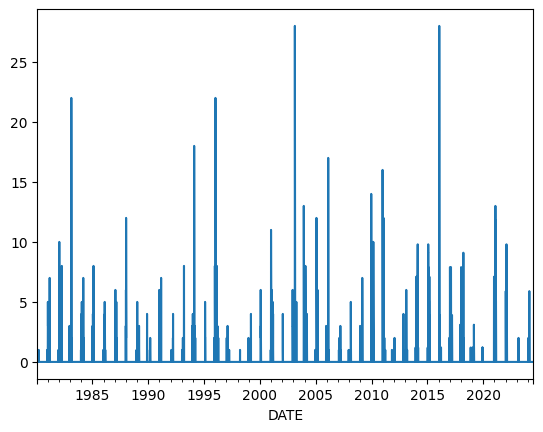

In [ ]:
weather["snwd"].plot()

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1980-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37,28
1980-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,25
1980-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,17
1980-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,14
1980-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,10
...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,70
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,69
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71


In [ ]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37,28,31.0
1980-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,25,28.0
1980-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,17,26.0
1980-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,14,24.0
1980-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,10,27.0
...,...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,70,85.0
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,69,91.0
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0


In [ ]:
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37,28,31.0
1980-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,25,28.0
1980-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,17,26.0
1980-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,14,24.0
1980-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,10,27.0
...,...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,70,85.0
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,69,91.0
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0


# ML model Training

In [ ]:
#incase of regular model collinearity to be kept in mind
numeric_weather = weather.select_dtypes(include=['number'])
correlation_matrix = numeric_weather.corr()
print(correlation_matrix)

            prcp      snow      snwd      tmax      tmin    target
prcp    1.000000  0.148671  0.000150 -0.008141  0.052915 -0.001492
snow    0.148671  1.000000  0.233537 -0.172909 -0.157055 -0.171175
snwd    0.000150  0.233537  1.000000 -0.259547 -0.255827 -0.239490
tmax   -0.008141 -0.172909 -0.259547  1.000000  0.954821  0.914593
tmin    0.052915 -0.157055 -0.255827  0.954821  1.000000  0.914054
target -0.001492 -0.171175 -0.239490  0.914593  0.914054  1.000000


In [ ]:
#using Ridge which helps adjust for collinearity
from sklearn.linear_model import Ridge

#Initializing Ridge model
rr = Ridge(alpha=.1)

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [ ]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i + step), :]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

# Making Predictions

In [ ]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1990-01-25,49.0,52.789222,3.789222
1990-01-26,44.0,50.257268,6.257268
1990-01-27,58.0,45.775311,12.224689
1990-01-28,45.0,54.171823,9.171823
1990-01-29,46.0,49.335535,3.335535
...,...,...,...
2024-06-23,85.0,83.930799,1.069201
2024-06-24,91.0,83.426599,7.573401
2024-06-25,84.0,87.177822,3.177822


In [ ]:
#Accuracy measure - here Mean accuracy measure
#from sklearn metrics
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.122442798911608

In [ ]:
#or mean error
predictions["diff"].mean()

5.122442798911608

# Improve accuracy

In [ ]:
def pct_diff(old, new):
  return (new-old)/old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

rolling_horizons = [3,14]

for horizon in rolling_horizons:
  for col in ["tmax", "tmin", "prcp"]:
    weather = compute_rolling(weather, horizon, col)

weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1980-01-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37,28,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,25,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,17,26.0,32.000000,-0.125000,23.333333,-0.271429,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,14,24.0,28.333333,-0.082353,18.666667,-0.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,10,27.0,26.000000,-0.076923,13.666667,-0.268293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,70,85.0,87.666667,-0.030418,70.000000,0.000000,0.013333,-1.000000,80.785714,0.052166,65.714286,0.065217,0.063571,-1.000000
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,69,91.0,85.666667,-0.007782,70.333333,-0.018957,0.013333,-1.000000,81.357143,0.044776,66.142857,0.043197,0.063571,-1.000000
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,70.000000,0.014286,0.000000,NaN,82.714286,0.100173,66.928571,0.060832,0.063571,-1.000000


In [ ]:
weather = weather.iloc[14:,:]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1980-02-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,41,30,32.0,46.333333,-0.115108,33.333333,-0.100000,0.000000,NaN,40.928571,0.001745,27.142857,0.105263,0.075714,-1.000000
1980-02-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,16,36.0,40.666667,-0.213115,27.333333,-0.414634,0.000000,NaN,40.571429,-0.211268,26.428571,-0.394595,0.075714,-1.000000
1980-02-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,16,30.0,36.333333,-0.009174,20.666667,-0.225806,0.000000,NaN,40.428571,-0.109541,25.714286,-0.377778,0.075714,-1.000000
1980-02-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,30,22,22.0,32.666667,-0.081633,18.000000,0.222222,0.000000,NaN,39.428571,-0.239130,25.500000,-0.137255,0.075714,-1.000000
1980-02-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,22,9,24.0,29.333333,-0.250000,15.666667,-0.425532,0.000000,NaN,38.428571,-0.427509,24.071429,-0.626113,0.075000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,70,85.0,87.666667,-0.030418,70.000000,0.000000,0.013333,-1.000000,80.785714,0.052166,65.714286,0.065217,0.063571,-1.000000
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,69,91.0,85.666667,-0.007782,70.333333,-0.018957,0.013333,-1.000000,81.357143,0.044776,66.142857,0.043197,0.063571,-1.000000
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,70.000000,0.014286,0.000000,NaN,82.714286,0.100173,66.928571,0.060832,0.063571,-1.000000


In [ ]:
weather = weather.fillna(0)

In [ ]:
#adding more predictors
def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1980-02-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,41,30,32.0,46.333333,-0.115108,...,27.142857,0.105263,0.075714,-1.000000,41.000000,41.000000,30.000000,30.000000,0.000000,0.000000
1980-02-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,16,36.0,40.666667,-0.213115,...,26.428571,-0.394595,0.075714,-1.000000,36.500000,32.000000,23.000000,16.000000,0.000000,0.000000
1980-02-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,16,30.0,36.333333,-0.009174,...,25.714286,-0.377778,0.075714,-1.000000,36.333333,36.000000,20.666667,16.000000,0.000000,0.000000
1980-02-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,30,22,22.0,32.666667,-0.081633,...,25.500000,-0.137255,0.075714,-1.000000,34.750000,30.000000,21.000000,22.000000,0.000000,0.000000
1980-02-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,22,9,24.0,29.333333,-0.250000,...,24.071429,-0.626113,0.075000,-1.000000,32.200000,22.000000,18.600000,9.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,70,85.0,87.666667,-0.030418,...,65.714286,0.065217,0.063571,-1.000000,78.173492,81.244444,62.781832,65.488889,0.126121,0.128000
2024-06-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,69,91.0,85.666667,-0.007782,...,66.142857,0.043197,0.063571,-1.000000,78.178571,81.177778,62.786458,65.800000,0.126027,0.078222
2024-06-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,71,84.0,87.000000,0.045977,...,66.928571,0.060832,0.063571,-1.000000,78.188104,81.844444,62.792565,66.622222,0.125933,0.104444


In [ ]:
#creating list of predictors after adding more predictors
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.776904968805274

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.432839,30.567161
2007-03-26,78.0,50.079288,27.920712
1998-03-26,80.0,52.283944,27.716056
2003-04-15,86.0,59.509672,26.490328
2022-12-23,16.0,41.453976,25.453976
...,...,...,...
2018-07-07,78.0,77.997290,0.002710
2024-06-18,82.0,81.997554,0.002446
2005-04-15,58.0,57.997665,0.002335


In [ ]:
weather.loc["1990-03-07" : "1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.741325,42.909091,34.025237,28.909091,0.121798,0.110000
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.710692,45.363636,33.981132,30.363636,0.121415,0.079091
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.692790,45.909091,33.965517,31.090909,0.121066,0.026364
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.687500,44.818182,33.981250,31.818182,0.120719,0.081818
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.719626,47.181818,34.003115,31.090909,0.120498,0.172727
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.751553,47.727273,34.031056,34.363636,0.120124,0.162727
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.863777,49.636364,34.052632,33.000000,0.119752,0.077273
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.904321,50.909091,34.089506,36.272727,0.119383,0.336364
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.923077,51.545455,34.116923,36.909091,0.119015,0.036364


<Axes: xlabel='diff'>

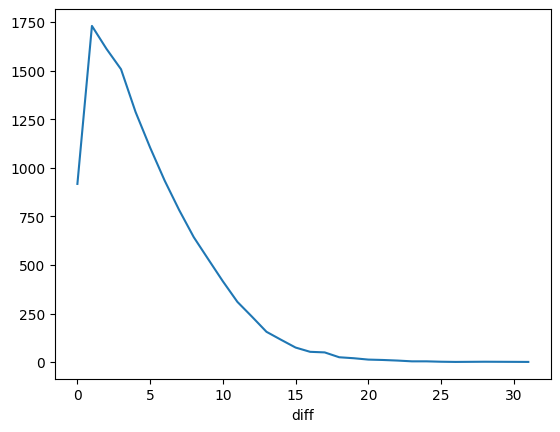

In [ ]:
predictions["diff"].round().value_counts().sort_index().plot()